In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("../rk1/Admission_Predict_Ver1.1.csv")

data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [2]:
# Число пропусков
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [3]:
# Целевой признак
target = "Chance of Admit"

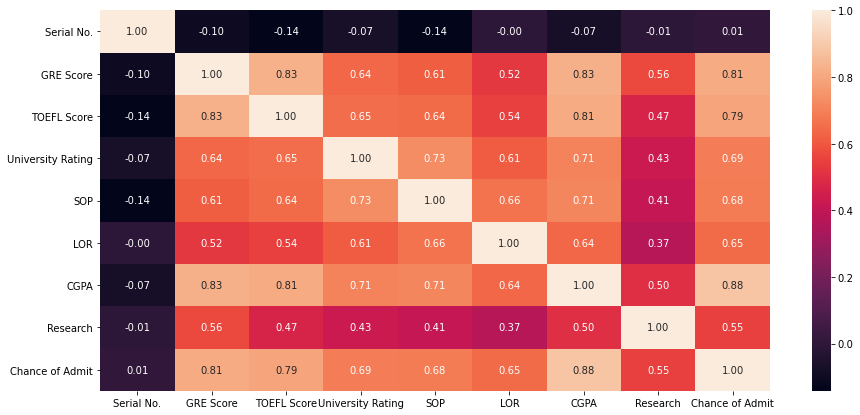

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method="pearson"),ax=ax,annot=True,fmt='.2f');

In [5]:
data.drop(["Serial No."], axis=1, inplace=True)

In [6]:
# Масштабирование
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in data.columns:
  if col != target:
    data[col] = scaler.fit_transform(data[[col]])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  data.drop([target], axis=1),
  data[target],
  test_size=0.3,
  random_state=1,
)

# Выбор метрик

Mean absolute error - средняя абсолютная ошибка.
Чем ближе значение к нулю, тем лучше качество регрессии.
Основная проблема метрики состоит в том, что она не нормирована.
Вычисляется с помощью функции mean_absolute_error.

Метрика R^2 или коэффициент детерминации.
Вычисляется с помощью функции r2_score.

# Линейная регрессия

In [8]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error

linreg_predict = linreg.predict(X_test)
r2_score(y_test, linreg_predict), \
  mean_absolute_error(y_test, linreg_predict)

(0.8157672116057979, 0.043975442403391976)

# Градиентный бустинг

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gboostreg = GradientBoostingRegressor(random_state=10).fit(X_train, y_train)

In [11]:
gboostreg_predict = gboostreg.predict(X_test)
r2_score(y_test, gboostreg_predict), \
  mean_absolute_error(y_test, gboostreg_predict)

(0.7906515827412701, 0.04666150482803812)

# Вывод

r2_score больше у линейной регрессии.

MAE ближе к нулю у линейной регрессии.

По обеим метрикам выигрывает линейная регрессия